## Exploring iSOON's Leaked Chats

### Setup Dependencies

In [39]:
import sys
import os
import nltk
from wordcloud import WordCloud,STOPWORDS
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from matplotlib import rcParams
import spacy
import gensim
from gensim.parsing.preprocessing import STOPWORDS as gensim_stopwords
from gensim.parsing.preprocessing import remove_stopwords

## Wordcloud Visualization

### Read Chat File

In [22]:

path = os.path.join(os.getcwd(),"isoon_chats_english.txt")
with open(path,"r") as fh:
        file_data = fh.read()

### Setup Stopwords

In [8]:
spacy_stopwords = spacy.load('en_core_web_sm')
sw_spacy = list(spacy_stopwords.Defaults.stop_words)

['mostly', 'mine', 'take', 'very', 'while', 'also', 'however', 'front', 'keep', 'moreover', 'has', '‘d', 'down', 'alone', 'nothing', 'serious', 'its', 'whereas', 'yourself', 'rather', 'along', 'they', 'eleven', 'go', 'with', 'amount', 'nowhere', 'well', 'top', 'wherein', "'s", 'whether', 'often', 'say', 'myself', 'twelve', 'thus', 'n’t', 'already', 'latterly', 'were', "n't", 'must', 'an', 'formerly', 'each', 'now', 'ourselves', 'always', 'was', 'made', 'someone', 'and', 'herein', 're', 'seems', 'us', 'this', 'part', 'namely', 'such', 'besides', 'give', 'only', 'across', 'below', 'same', 'sometimes', 'the', 'anyway', 'how', 'by', 'but', 'through', 'side', 'all', 'nobody', 'thru', 'thereupon', 'used', 'many', 'can', 'back', 'various', 'my', 'without', 'five', 'among', 'except', 'much', 'anything', 'ours', 'anyone', 'meanwhile', 'what', 'seem', 'ca', '’re', 'any', 'else', 'thence', 'whole', 'on', 'three', 'make', 'her', 'am', 'been', 'himself', '‘ve', 'cannot', 'hereupon', 'therefore', 't

In [18]:
#create stop words 
nltk.download("stopwords")

#list of stopwords
stopwords = stopwords.words("english")
stopwords.extend([
    'td',
    'tr',
    'NULL'
])
stopwords.extend(sw_spacy)
stopwords.extend(list(gensim_stopwords))

[nltk_data] Downloading package stopwords to /home/bikram-
[nltk_data]     xps/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Generate Wordcloud

In [19]:
MAX_WORDS = 500

In [24]:
#call the wordcloud Constructor 
WC = WordCloud(
    stopwords=stopwords,
    max_words=MAX_WORDS,
    background_color="black", 
    width=1800, 
    height=800, 
    collocations=False).generate(file_data)

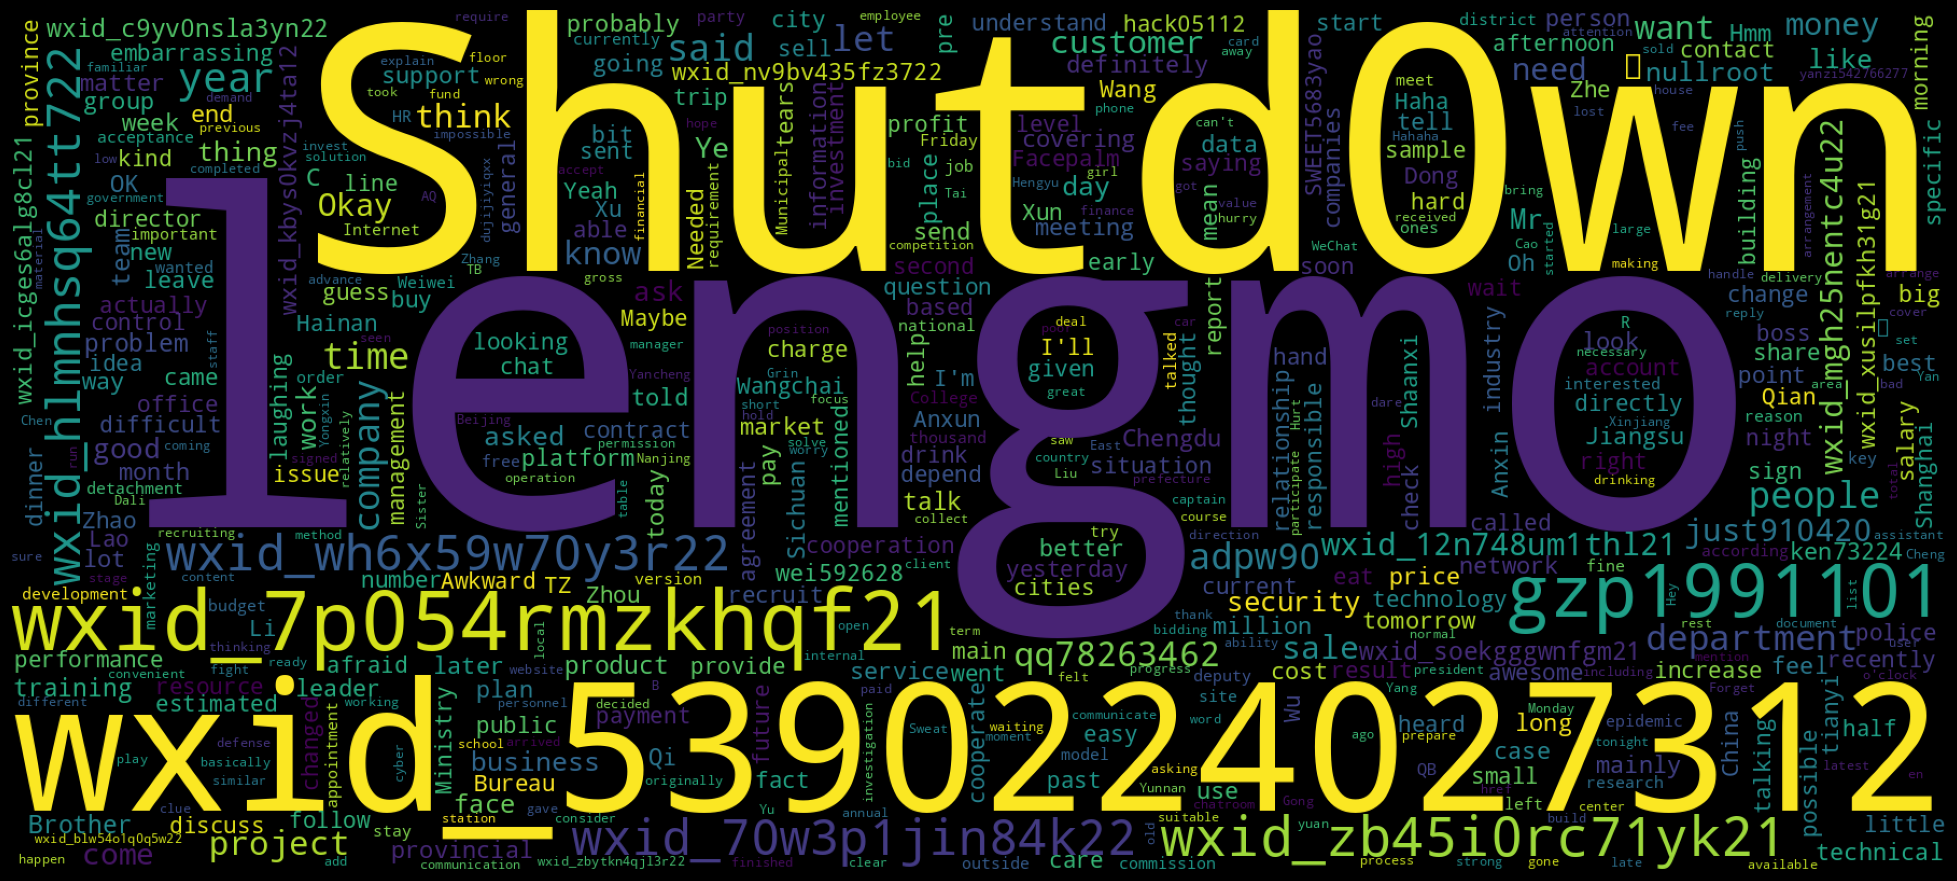

In [25]:
plt.figure(figsize=(25,15), facecolor='black')
plt.imshow(WC)
plt.axis("off")
plt.show()

## Extract Observables / Interesting Strings

In [84]:
from ioc_finder import find_iocs, parse_domain_names

observables = parse_domain_names(file_data)

In [93]:
observables = [observable for observable in observables if not observable.endswith('-en.md')]

['baike.baidu.com',
 'drdo.gov.in',
 'finance.sina.com.cn',
 'gd9189.com',
 'm.guancha.cn',
 'm.sohu.com',
 'mahagst.gov.in',
 'meeting.tencent.com',
 'mjj-rocrpy.vaiwan.com',
 'pan.baidu.com',
 'qq.com',
 'selectarticlenewsbyid.do',
 'surl.amap.com',
 't.wss.ink',
 'translate.google.com',
 'w66588.com',
 'w81518.com',
 'www.57w66.com',
 'www.cac.gov.cn',
 'www.cyberdefensemagazine.com',
 'www.plap.cn',
 'www.w66369.com',
 'www.w81519.com',
 'www.yutainews.com',
 'zhuanlan.zhihu.com']

## Extract Entities via Named Entity Extraction

In [34]:
from spacy import displacy
from collections import Counter
import en_core_web_sm
from pprint import pprint

nlp = en_core_web_sm.load()

In [45]:
file_data = remove_stopwords(file_data)
doc = nlp(file_data[:1000000])
extracted_entities = list(set([(X.text, X.label_) for X in doc.ents]))

### All Entities

In [47]:
import pandas as pd

df = pd.DataFrame.from_records(extracted_entities, columns = ['entity_name', 'entity_type'])
df

,entity_name,entity_type
0,9,CARDINAL
1,u200cu200cu200eu200eu200cu200cu200eu200cu200cu...,ORG
2,Zhang Shibin,PERSON
3,Gu Yun’s,PERSON
4,2022-11-14,DATE
...,...,...
3601,Xiao Zheming,PERSON
3602,gzp1991101 Li,PERSON
3603,3 weekends,DATE
3604,wxid_zb45i0rc71yk21 TG,ORG


### All Entities of type Person

In [48]:
df.query('entity_type == "PERSON"')

,entity_name,entity_type
2,Zhang Shibin,PERSON
3,Gu Yun’s,PERSON
6,Liang,PERSON
7,Ganzi Aba Sichuan,PERSON
9,-24,PERSON
...,...,...
3597,Add Xu Chao,PERSON
3599,Ku,PERSON
3601,Xiao Zheming,PERSON
3602,gzp1991101 Li,PERSON


### All Entities of Type Organization

In [52]:
df.query('entity_type == "ORG"')

,entity_name,entity_type
1,u200cu200cu200eu200eu200cu200cu200eu200cu200cu...,ORG
12,PPT,ORG
15,mmp,ORG
20,wxid_zb45i0rc71yk21 New,ORG
21,wxid_zb45i0rc71yk21 Needed wxid_zb45i0rc71yk21,ORG
...,...,...
3583,Shanghai Criminal Investigation,ORG
3585,The Sichuan Department,ORG
3588,adpw90 wxid_7p054rmzkhqf21 Sichuan,ORG
3596,My Arhat Bureau,ORG


### All Entities of Type Nationality

In [53]:
df.query('entity_type == "NORP"')

,entity_name,entity_type
82,Longyan,NORP
114,A+,NORP
194,Xun,NORP
314,PP,NORP
368,Key,NORP
378,Dongbian,NORP
389,Hahahaha wxid_nv9bv435fz3722 wxid_70w3p1jin84k22,NORP
431,K.,NORP
582,Xiaojuan,NORP
588,Shenyang,NORP


### All Entities Indicative of a Location

In [54]:
df.query('entity_type == "GPE"')


,entity_name,entity_type
26,year.</tr><tr,GPE
32,Zhiluetang,GPE
66,money</tr><tr,GPE
85,Normally,GPE
94,Battle Nanjing,GPE
...,...,...
3541,Putian,GPE
3543,district county,GPE
3552,Xi’an,GPE
3589,Hubei,GPE


In [60]:
extracted_entities = [(X.text, X.label_) for X in doc.ents if X.label_ == 'GPE']
Counter(extracted_entities).most_common(10)

[(('Chengdu', 'GPE'), 86),
 (('Jiangsu', 'GPE'), 83),
 (('’s', 'GPE'), 75),
 (('Wangchai', 'GPE'), 65),
 (('Hainan', 'GPE'), 54),
 (('gzp1991101', 'GPE'), 53),
 (('Shanghai', 'GPE'), 51),
 (('China', 'GPE'), 44),
 (('Sichuan', 'GPE'), 39),
 (('Shaanxi', 'GPE'), 37)]

### Top mentioned nationalities

In [62]:
extracted_entities = [(X.text, X.label_) for X in doc.ents if X.label_ == 'NORP']
Counter(extracted_entities).most_common(20)

[(('hack05112', 'NORP'), 50),
 (('’s', 'NORP'), 19),
 (('Chinese', 'NORP'), 10),
 (('Hui', 'NORP'), 9),
 (('Sichuan', 'NORP'), 7),
 (('Han', 'NORP'), 4),
 (('European', 'NORP'), 4),
 (('Vietnamese', 'NORP'), 3),
 (('Indian', 'NORP'), 3),
 (('PP', 'NORP'), 3),
 (('Xiaojuan', 'NORP'), 3),
 (('Korean', 'NORP'), 2),
 (('Philippine', 'NORP'), 2),
 (('South Korean', 'NORP'), 2),
 (('Scan', 'NORP'), 2),
 (('Alibaba', 'NORP'), 2),
 (('Suqian', 'NORP'), 2),
 (('Buddhist', 'NORP'), 2),
 (('A+', 'NORP'), 2),
 (('Thai', 'NORP'), 2)]

### Top mentioned organizations

In [64]:
extracted_entities = [(X.text, X.label_) for X in doc.ents if X.label_ == 'ORG']
Counter(extracted_entities).most_common(20)

[(('wxid_zb45i0rc71yk21', 'ORG'), 610),
 (('TZ', 'ORG'), 41),
 (('gzp1991101 wxid_7p054rmzkhqf21', 'ORG'), 34),
 (('wxid_nv9bv435fz3722 wxid_70w3p1jin84k22', 'ORG'), 31),
 (('Anxun College', 'ORG'), 24),
 (('WeChat', 'ORG'), 22),
 (('ken73224', 'ORG'), 22),
 (('NATO', 'ORG'), 18),
 (('adpw90 好 adpw90', 'ORG'), 14),
 (('TB', 'ORG'), 13),
 (('Android', 'ORG'), 10),
 (('wxid_zb45i0rc71yk21 wxid_zb45i0rc71yk21', 'ORG'), 9),
 (('gzp1991101', 'ORG'), 9),
 (('Vietnam Academy Social Sciences', 'ORG'), 8),
 (('wxid_5390224027312 wxid_70w3p1jin84k22', 'ORG'), 8),
 (('TW', 'ORG'), 8),
 (('IP', 'ORG'), 7),
 (('The Sichuan Department', 'ORG'), 6),
 (('Needed', 'ORG'), 5),
 (('Boss C', 'ORG'), 5)]

### Top Mentioned People

In [65]:
extracted_entities = [(X.text, X.label_) for X in doc.ents if X.label_ == 'PERSON']
Counter(extracted_entities).most_common(20)

[(('qq78263462', 'PERSON'), 337),
 (('just910420', 'PERSON'), 163),
 (('Qi Anxin', 'PERSON'), 59),
 (('C', 'PERSON'), 59),
 (('lengmo', 'PERSON'), 53),
 (('Wu', 'PERSON'), 48),
 (('Wang Zhe', 'PERSON'), 46),
 (('Dong', 'PERSON'), 44),
 (('Xu Qian', 'PERSON'), 41),
 (('Zhou Weiwei', 'PERSON'), 37),
 (('Wang', 'PERSON'), 34),
 (('just910420 lengmo', 'PERSON'), 29),
 (('Zhao Hengyu', 'PERSON'), 26),
 (('Gong', 'PERSON'), 21),
 (('SWEET5683yao', 'PERSON'), 21),
 (('An Xun', 'PERSON'), 20),
 (('Huang Le', 'PERSON'), 20),
 (('Dali', 'PERSON'), 20),
 (('Anxun', 'PERSON'), 19),
 (('Hmm', 'PERSON'), 19)]

### Top mentioned locations

In [66]:
extracted_entities = [(X.text, X.label_) for X in doc.ents if X.label_ == 'GPE']
Counter(extracted_entities).most_common(20)

[(('Chengdu', 'GPE'), 86),
 (('Jiangsu', 'GPE'), 83),
 (('’s', 'GPE'), 75),
 (('Wangchai', 'GPE'), 65),
 (('Hainan', 'GPE'), 54),
 (('gzp1991101', 'GPE'), 53),
 (('Shanghai', 'GPE'), 51),
 (('China', 'GPE'), 44),
 (('Sichuan', 'GPE'), 39),
 (('Shaanxi', 'GPE'), 37),
 (('Xinjiang', 'GPE'), 35),
 (('Nanjing', 'GPE'), 34),
 (('Yancheng', 'GPE'), 30),
 (('n’t', 'GPE'), 23),
 (('Beijing', 'GPE'), 20),
 (('Xiaoliang', 'GPE'), 19),
 (('Chongqing', 'GPE'), 15),
 (('Yunnan', 'GPE'), 15),
 (('Hong Kong', 'GPE'), 14),
 (('Wuxi', 'GPE'), 14)]